In [1]:
import sys
import os

sys.path.append(os.path.abspath("../code"))

from PGTS import HyperbolicAlgebra
from geoopt import ManifoldTensor

import torch
import matplotlib.pyplot as plt
from matplotlib import colormaps

In [2]:
import matplotlib.patches as patches
a = HyperbolicAlgebra()

from matplotlib.transforms import ScaledTranslation
import numpy as np

font_path = "."

from matplotlib import font_manager as fm

font_color = "#373737"

plt.rcParams['axes.grid'] = False
plt.rcParams['grid.color'] = "Grey"
plt.rcParams['grid.linestyle'] = "--"
plt.rcParams['grid.linewidth'] = 1
plt.rcParams['grid.alpha'] = 1

plt.rcParams['xtick.direction'] = "in"
plt.rcParams['ytick.direction'] = "in" 
plt.rcParams["xtick.major.size"] =  6
plt.rcParams["xtick.minor.size"] = 3
plt.rcParams["xtick.major.width"]= 1.3
plt.rcParams["xtick.minor.width"] =  1

plt.rcParams["ytick.major.size"] =  6
plt.rcParams["ytick.minor.size"] =  3
plt.rcParams["ytick.major.width"]= 1.3

plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.edgecolor'] = font_color 
plt.rcParams['text.color'] = font_color 

plt.rc('font', size=20)
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)



plt.rcParams.update({
    'text.color': font_color ,       
    'axes.labelcolor': font_color ,
    'xtick.color': font_color ,
    'ytick.color': font_color ,
    'axes.titlecolor': font_color,
})

# Explaining the space

In [3]:
m = HyperbolicAlgebra()

In [4]:
x_max = 5
step = 0.1

separator =  ManifoldTensor(torch.cat([torch.arange(-x_max, x_max, step)[:,None], 
                                       torch.zeros(int(2*x_max/step))[:,None]], dim = -1), 
                                       manifold = m)

def hyp_circle(d = torch.tensor(1.), n_steps = 100):

    coshd = torch.cosh(d)

    y2_max = torch.sqrt((coshd**2-1)/(coshd+1)/2)

    step = 2 * y2_max / n_steps

    y2 = torch.arange(-y2_max, y2_max, step)[:,None]
    y1_plus = 0.5*torch.log(coshd - y2**2 + torch.sqrt(coshd**2 - 2 * y2**2 * (coshd + 1) - 1)) - torch.log(y2**2 + 1)
    y1_minus = 0.5*torch.log(coshd - y2**2 - torch.sqrt(coshd**2 - 2 * y2**2 * (coshd + 1) - 1)) - torch.log(y2**2 + 1)
   
    y1 = torch.cat([y1_minus, reversed(y1_plus), ], dim = 0)
    y2 = torch.cat([y2, reversed(y2)], dim = 0)
    
    return ManifoldTensor(torch.cat([y1, y2], dim = -1), manifold = m)


In [5]:
def from_poinc_to_hyp(x):
    X = 2*x/np.expand_dims((1-np.sum(x**2, axis = -1)), axis = 1)
    Z = np.expand_dims((1+np.sum(x**2, axis = -1))/(1-np.sum(x**2, axis = -1)), axis = 1)

    return np.hstack((X,Z))

<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_2157613/3575779578.py:8: SyntaxWarning: invalid escape sequence '\m'
  titles = {"A":"Geodesics in $\mathcal{M}^{[1,2]}$",


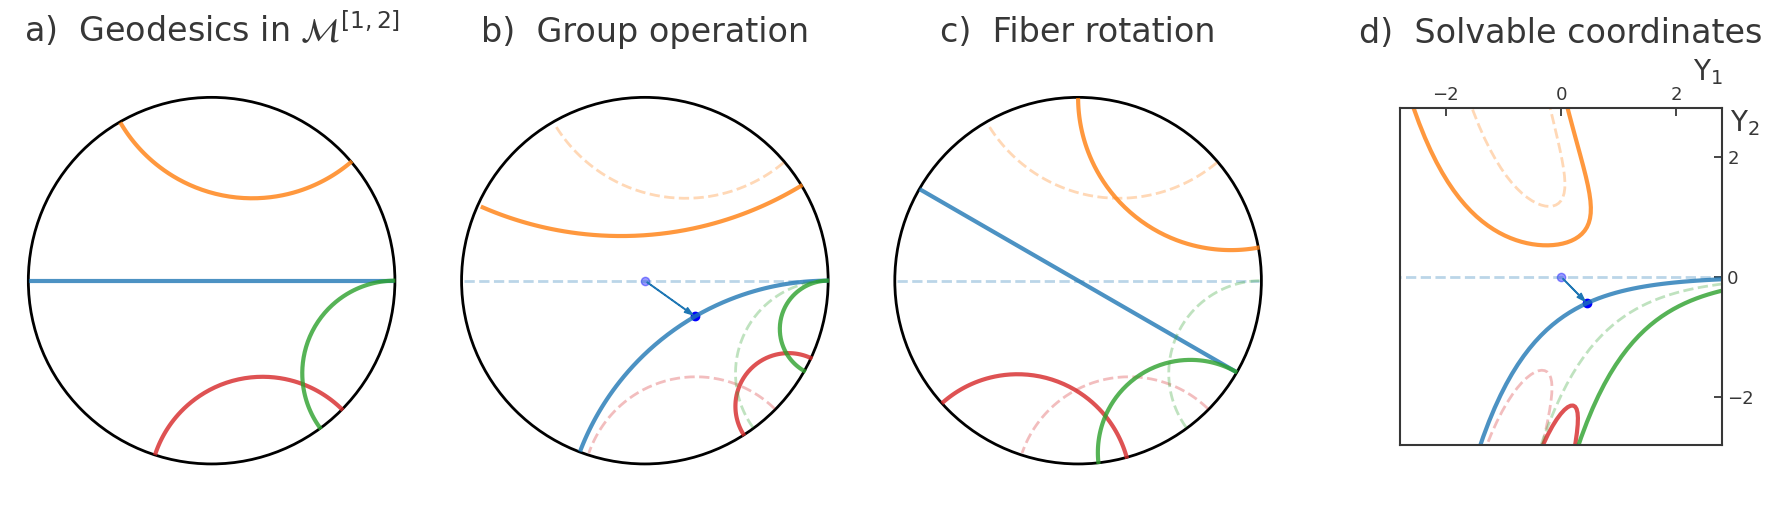

In [6]:
geodesics = [(ManifoldTensor([0, 0.], manifold = m), torch.tensor([1., 0.], dtype=torch.float32), ),
              (ManifoldTensor([0, -1.2], manifold=m), torch.tensor([np.cos(-2*np.pi/3),np.sin(-2*np.pi/3)], dtype=torch.float32), ),
              (ManifoldTensor([0.3, 1.2], manifold=m), torch.tensor([np.cos(1.2*np.pi/2), np.sin(1.2*np.pi/2)], dtype=torch.float32), ),
              (ManifoldTensor([0.5, -1.2], manifold=m), torch.tensor([np.cos(0*np.pi), np.sin(0*np.pi)], dtype=torch.float32), ),]

colors = ["tab:blue", "tab:orange", "tab:red", "tab:green"]

titles = {"A":"Geodesics in $\mathcal{M}^{[1,2]}$", 
          "B":"Group operation", 
          "D":"Solvable coordinates",
          "C":"Fiber rotation"}

fig, ax = plt.subplot_mosaic('ABCD', figsize=(18, 6))
fig.tight_layout()

group_action = ManifoldTensor([0.45, -0.44], manifold=a)
fiber_rot = torch.tensor([np.cos(np.pi/6), np.sin(np.pi/6)], dtype=torch.float32)


for i, (b, phi) in enumerate(geodesics):
    separator_temp = m.fiber_rotation(m.group_mul(separator, b), phi)
    separator_ball = m.to_ball_representation(separator_temp).numpy()
    separator_op = m.group_mul(separator_temp, group_action)
    separator_op_ball = m.to_ball_representation(separator_op).numpy()
    separator_rot = m.fiber_rotation(separator_temp, fiber_rot)
    separator_rot_ball = m.to_ball_representation(separator_rot).numpy()
    
    ax["A"].plot(separator_ball[:,0], 
               separator_ball[:,1], 
               color = colors[i], linewidth = 3, alpha = 0.8)
    for label in ["B"]:
      ax[label].plot(separator_ball[:,0], 
                separator_ball[:,1], 
                color = colors[i], linewidth = 2, alpha = 0.3, linestyle='--')
    ax["B"].plot(separator_op_ball[:,0], 
               separator_op_ball[:,1], 
               color = colors[i], linewidth = 3, alpha = 0.8)
    
    for label in ["C"]:
      ax[label].plot(separator_ball[:,0], 
                separator_ball[:,1], 
                color = colors[i], linewidth = 2, alpha = 0.3, linestyle='--')
    ax["C"].plot(separator_rot_ball[:,0], 
               separator_rot_ball[:,1], 
               color = colors[i], linewidth = 3, alpha = 0.8)


    for label in ["D"]:
      ax[label].plot(separator_temp[:,0], 
                separator_temp[:,1], 
                color = colors[i], linewidth = 2, alpha = 0.3, linestyle='--')
    
    ax["D"].plot(separator_op.numpy()[:,0], 
               separator_op.numpy()[:,1], 
               color = colors[i], linewidth = 3, alpha = 0.8)
    
    X = from_poinc_to_hyp(separator_ball)
    X = X[X[:,2]>=1.]

      
for label in ["A", "B", "C"]:
  circle = plt.Circle((0., 0.), 1, color='black', fill=False, linewidth = 2)
  ax[label].add_patch(circle)
  ax[label].set_xlim(-1.1, 1.1)
  ax[label].set_ylim(-1.1, 1.1)
  ax[label].axis('equal')
  ax[label].set_xticks([])
  ax[label].set_yticks([])
  ax[label].axis('off')
  for axis in ['top','bottom','left','right']:
      ax[label].spines[axis].set_linewidth(4)

for label in ["D"]:
  ax[label].set_xlabel(r"$\Upsilon_1$", loc='right')
  ax[label].set_ylabel(r"$\Upsilon_2$", rotation=0, loc='top')
  ax[label].yaxis.tick_right()
  ax[label].yaxis.set_label_position("right")
  ax[label].xaxis.tick_top()
  ax[label].xaxis.set_label_position("top")
  ax[label].set_xticks([-2,0,2])
  ax[label].set_yticks([-2,0,2])
  ax[label].set_autoscale_on(False)
  ax[label].set_xlim(xmax = 2.8, xmin = -2.8)
  ax[label].set_ylim(ymax = 2.8, ymin = -2.8)
  ax[label].tick_params(axis="both")
  


for i, (label, axs) in enumerate(ax.items()):
    trans = ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)

    if label in ["A", "B", "C", "D"]:
      axs.set_title(label.lower() + ')  ' + titles[label], pad=10)
      


for label, target in zip(["D", "B"], [group_action.numpy(), m.to_ball_representation(group_action).numpy()]):
  ax[label].scatter([0], [0], color = "blue", alpha=0.4)
  b_ball= m.to_ball_representation(group_action).numpy()
  ax[label].scatter(target[0], target[1], color = "blue")
  style = "Simple, tail_width=0.4, head_width=4, head_length=6"
  kw = dict(arrowstyle=style, color="tab:blue")
  a1 = patches.FancyArrowPatch((0., 0), (target[0], target[1]), 
                                  connectionstyle="arc3,rad=0", **kw)
  ax[label].add_patch(a1)

fig.tight_layout()

pos = ax['D'].get_position()
ax['D'].set_position([pos.x0+0.05, pos.y0+0.1, pos.width * 0.8, pos.height * 0.75])

# Save the plot as an SVG file
plt.savefig('./images/fig0.svg', format='svg', dpi = 1000, bbox_inches='tight')
plt.savefig('./images/fig0.jpeg', format='jpeg', dpi = 1000, bbox_inches='tight')

plt.show()